# <center> **Hoheneder Final Term Project:**

## <center> **Spatial Evaluation of the Cheat River Watershed Hydrograph Response to a Large Storm Event**

<center> Study Site: Cheat River Watershed in North-Central, West Virginia, USA

ESCI895: Hydrologic Data Analysis, Fall 2021

University of New Hampshire

In [ ]:
#%% Description of Dataset and Purpose of Code: 

#Description: 
# Project File Taking Numerous Stream Gauges for a Given Watershed Area and Evaluating How That Pulse of Water
#Moves Through The Given Watershed for a Single Storm Event

#Major Products Inlcude: Time Series Plots, Z-Score Values of Discharge, Basic Stats of Discharge Comparison

#Major Conclusion: The Storm Event Factors More on the Path of the Storm than the Site Hydrologic Properties 


In [ ]:
#Install Libraries for Project: 
import pandas as pd
import datetime
from pprint import pprint
import numpy as np
from matplotlib import pyplot as plt


# <center> **Introduction**

**Central Project Goals:** 

* How does peak discharge temporally vary within a watershed for a single large-scale flooding event? 
* How does event flow discharge move thorugh a watershed during a single storm event? 
* Is it possible to track the path a storm took within a watershed based upon the hydrograph response? 
* What insight does monitoring discharge provide those seeking to mitigate the damage of flooding in the future? 

.

**Introducion to Project:**

This project seeks to address how water specifically moved through the Cheat River watershed during a large-sclae flooding event in 2019. The magnitude of this flooding event marginally compares to the single largest flooding event for the watershed which took place in 1985. **The Election Day Floods of 1985** caused damages in excess of **$700M** to West Virginia which was found “woefully underprepared” for floods of such magnitude. In fact, the amount of damage caused to the Cheat River watershed area was in excess of the state's entire fiscal budget for 1985 (Luke, 1988, “Response to West Virginia’s...”). Evaluating how large discharge events move throughout a watershed temporally and in magnitude can provide insight into what steps can be taken to mitigate damage and harm to communities and their residents, as well as developing a hydrologic comprehension of how water is temporally and geographically intertwined to a watershed area. If a river network displays a consistent trend in magnitude and time for how discharge moves through its watershed, then a plan can be enacted to defend against flooding impacts. In the context of West Virginia, centering hydrologic research upon the Cheat River basin seeks to evaluate and defend an **understudied** and **historically disadvantaged** region of the United States in disaster preparedness.

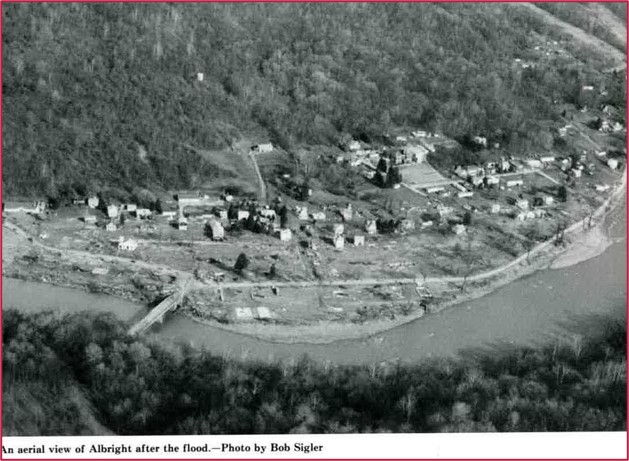

<center> Image: Albright, West Virginia Following the 1985 Election Day Floods

.

<left> Discharge data for the 2019 event will be employed in lieu of the 1985 Election Day Floods due to scant data coverage for the 1985 event. While suitable coverage can be found for the USGS network during 2019, the same cannot be said for 1985 where only two operational discharge gauges were located within the watershed at the time of the storm event. For the 1985 floods, only two gauges in the Cheat River watershed were operational, and of these guages, only a daily value of discharge was produced. Hence, a proxy for the catastrophic 1985 flooding events will be replaced with the 2019 highly-covered flooding event despite a considerable drop in overall flood magnitude. 

**Impact of Study:**

In the context of West Virginia, centering hydrologic research upon the Cheat River basin seeks to evaluate and defend an **understudied** and **historically disadvantaged** region of the United States in disaster preparedness. This study aims to not only produce information that is useful in a global hydrologic sense where it can be applied to numerous watersheds and storm events, but especially looks towards areas where natural disaster resource allocation and preparedness is lacking. Furthermore, by highly commenting code and the methodology of this study, the accesability of its products to peoples of all learning levels, both academic and non-academic becomes broader. 





In [ ]:
#%% Importing Raw Datafiles: 

#Importing Data Files: 
albright_file= 'Albright.txt'
blackwater_file= 'Blackwater.txt'
bowden_file= 'Bowden.txt'
hendricks_file = 'Hendricks.txt'
parsons_file= 'Parsons.txt'
rockville_file= 'Rockville.txt'

# <center> **The Cheat River Watershed of North Central West Virginia:**


**The Cheat River Watershed:** 

The Cheat River watershed is a 3682.9km2 catchment located entirely within **North-Central West Virginia** where the Cheat River proper flows 135km northward from the confluence of Shavers Fork and the Blackwater River to eventually terminate at Point Marion, PA, as the larger Monongahela River as a portion of the greater Ohio River network. 

.

**Major Tributaries of the Cheat River Watershed:**
*   Shavers Fork
*   Blackwater River
*   Big Sandy Creek
*   Dry Fork
*   Dry Run
*   Glady Fork
*   Laurel Fork

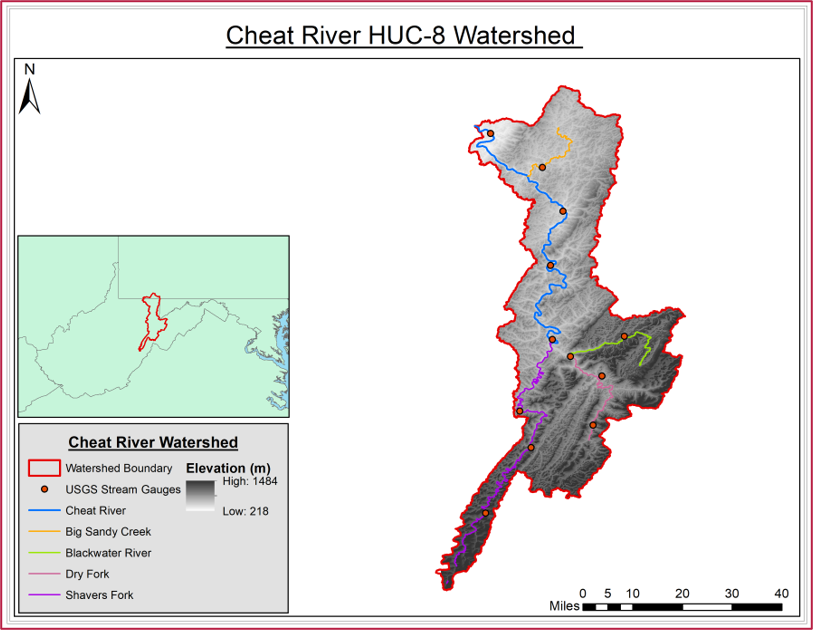
<center> Image: Elevation Profile and Tributaries of the Cheat River Watershed, West Virginia

.
    
<left> **Geography of the Cheat River Watershed:**

The Cheat River watershed is dominated by deciduous forest land cover, where the National Land Cover Dataset (NLCD) identifies over 85% of the watershed area as **deciduous forest** land cover. 

The watershed area is bordered by the **Appalachian Front** physiographic boundary to the east resulting in larger quantities of precipitation in the catchment with an average of 101.59 mm/yr with a maximum of 149.28 mm/yr in the southern extreme of the watershed adjacent to **Cheat Mountain**, from which the watershed receives its name. 

Given the physiographic boundaries of the watershed, elevation also dramatically varies with the eastern border of the watershed composed of the **Appalachian Front** terminus of the **Valley and Ridge** physiographic province, gradually losing elevation westward into the **Appalachian High Plateaus** towards the **Ohio River Valley**. 
    
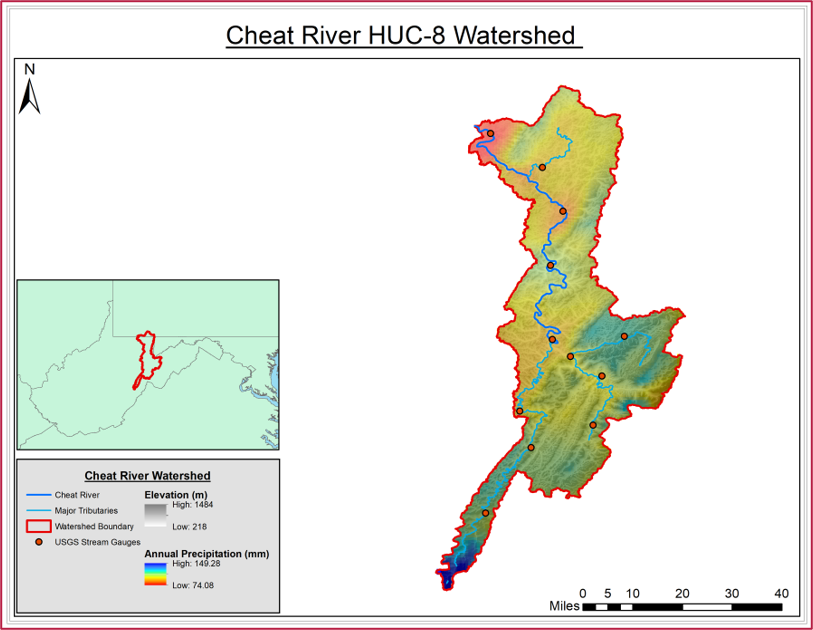
<center> Image: Annual Precipitation (PRISM Model) of the Cheat River Watershed, West Virginia

In [ ]:
#%% Importing DataFrames:  

#Albright:
df_albright= pd.read_table(albright_file, delimiter="\t", comment='#', 
                   header=1, parse_dates=['20d'], index_col=['20d'], 
                   na_values= [9999, -9999, 8888, -8888])
#Drop Columns: 
df_albright= df_albright.drop(columns={"5s", "15s", "6s", "10s", "10s.1"})
#Rename Columns: 
df_albright= df_albright.rename(columns={"14n": "Discharge (cfs)"})
df_albright= df_albright.rename(columns={"14n.1": "Stage (ft)"})
#Fill NaN Data: 
df_albright.interpolate(method = 'linear', inplace = True)

#Blackwater: 
df_blackwater= pd.read_table(blackwater_file, delimiter="\t", comment='#', 
                   header=1, parse_dates=['20d'], index_col=['20d'], 
                   na_values= [9999, -9999, 8888, -8888])
#Drop Columns: 
df_blackwater= df_blackwater.drop(columns={"5s", "15s", "6s", "10s"})
#Rename Columns: 
df_blackwater= df_blackwater.rename(columns={"14n": "Discharge (cfs)"})
df_blackwater= df_blackwater.rename(columns={"14n.1": "Stage (ft)"})
#Fill NaN Data: 
df_blackwater.interpolate(method = 'linear', inplace = True)
    
#Bowden: 
df_bowden= pd.read_table(bowden_file, delimiter="\t", comment='#', 
                   header=1, parse_dates=['20d'], index_col=['20d'], 
                   na_values= [9999, -9999, 8888, -8888])
#Drop Columns: 
df_bowden= df_bowden.drop(columns={"5s", "15s", "6s", "10s"})
#Rename Columns: 
df_bowden= df_bowden.rename(columns={"14n": "Discharge (cfs)"})
df_bowden= df_bowden.rename(columns={"14n.1": "Stage (ft)"})
#Fill NaN Data: 
df_bowden.interpolate(method = 'linear', inplace = True)
    
#Hendricks: 
df_hendricks= pd.read_table(hendricks_file, delimiter="\t", comment='#', 
                   header=1, parse_dates=['20d'], index_col=['20d'], 
                   na_values= [9999, -9999, 8888, -8888])
#Drop Columns: 
df_hendricks= df_hendricks.drop(columns={"5s", "15s", "6s", "10s"})
#Rename Columns: 
df_hendricks= df_hendricks.rename(columns={"14n": "Discharge (cfs)"})
df_hendricks= df_hendricks.rename(columns={"14n.1": "Stage (ft)"})
#Fill NaN Data: 
df_hendricks.interpolate(method = 'linear', inplace = True)  
    
#Parsons: 
df_parsons= pd.read_table(parsons_file, delimiter="\t", comment='#', 
                   header=1, parse_dates=['20d'], index_col=['20d'], 
                   na_values= [9999, -9999, 8888, -8888])
#Drop Columns: 
df_parsons= df_parsons.drop(columns={"5s", "15s", "6s", "10s", "10s.1"})
#Rename Columns: 
df_parsons= df_parsons.rename(columns={"14n": "Discharge (cfs)"})
df_parsons= df_parsons.rename(columns={"14n.1": "Stage (ft)"})
#Fill NaN Data: 
df_parsons.interpolate(method = 'linear', inplace = True)
    
#Rockville: 
df_rockville= pd.read_table(rockville_file, delimiter="\t", comment='#', 
                   header=1, parse_dates=['20d'], index_col=['20d'], 
                   na_values= [9999, -9999, 8888, -8888])
#Drop Columns: 
df_rockville= df_rockville.drop(columns={"5s", "15s", "6s", "10s"})
#Rename Columns: 
df_rockville= df_rockville.rename(columns={"14n": "Discharge (cfs)"})
df_rockville= df_rockville.rename(columns={"14n.1": "Stage (ft)"})
#Fill NaN Data: 
df_rockville.interpolate(method = 'linear', inplace = True)


## <center> **Establishing the Study Sites Within the Cheat River Watershed:**

This study employs a series of six streamflow gauges operated by the **United States Geological Survey (USGS)** to evaluate the properties of 15-min intervals of streamflow discharge, in cubic feet per second moving throughout the Cheat River watershed of a specific large storm event in late-June 2019. This storm event was the single largest storm event for the Cheat River Watershed in terms of peak discharge during the 2019 calendar year at numerous gauges within the watershed. Furthermore, this event is one of the 5 largest on record for the Albright, WV gauge which contains the longest period of discharge records within the Cheat River watershed.   

**Streamflow Guages of Study:**
* Dry Fork at Hendricks, WV (USGS: 03065000)
* Blackwater River at Davis, WV (USGS: 03066000)
* Shavers Fork below Bowden, WV (USGS: 03068800)
* Cheat River near Parsons, WV (USGS: 03069500)
* Cheat River at Albright, WV (USGS: 03070260)
* Big Sandy Creek at Rockville, WV (USGS: 03070500)

All streamflow gauges within the extent of the Cheat River HUC-8 watershed were selected for this study and were found to be operational for the full extent of the storm event. All data was gathered from the USGS as a portion of the NWIS hydrologic database. As depicted above, the streamflow gauges within the Cheat River watershed are distributed across all of the major tributaries so that no major tributary or another source of channelized hydrologic contribution to the Cheat River hydrologic network is missing from the storm event analysis.

. 

Based upon advanced knowledge of the storm system in 2019, the Bowden gauge along Shavers Fork will be considered a control gauge. This site is designated for a control gauge site as it is known the storm system did not pass through the area for this event. Such, the hydrogrpahic repsonse of this gauge should be minimal and present a basis to compare the rest of the gauges against. 

In [ ]:
#%% Create List of DataFrames and Constants for Functions and Looping: 

#Create List of Gauge Station DataFrames: 
df_list= [df_albright, df_blackwater, df_bowden, df_hendricks, df_parsons, df_rockville]

#Define Watershed Area: 
watershed_area= 1422 #sq-mi

#Define Start and End Dates--Initial Load Includes a Second Storm I Want to Avoid: 
starting_date= pd.to_datetime('2019-06-28 00:00:00')
ending_date= pd.to_datetime('2019-07-05 00:00:00')


In [ ]:
#%% Trim DataFrames to Desried Lengths--This Refuses to Work in a Function (See Below): 

#Define Function for Trimming DataFrames: 
def time_trim(df):
    #Trim DataFrames:
    df= df[starting_date:ending_date]
    return df    

#Iterative For Loop to Trim DataFrames: 
for item in df_list: 
    time_trim(item) #Doesn't Trim DataFrames???

#Text Output Statement to Let Me Know For Loop Ran: 
print('')
print('DataFrames Trimmed')
print('')

#Trim DataFrame--For Real This Time: 
df_albright_trim= df_albright[starting_date:ending_date]
df_blackwater_trim= df_blackwater[starting_date:ending_date]
df_bowden_trim= df_bowden[starting_date:ending_date]
df_hendricks_trim= df_hendricks[starting_date:ending_date]
df_parsons_trim= df_parsons[starting_date:ending_date]
df_rockville_trim= df_rockville[starting_date:ending_date]

#Create df_trim List: 
df_trim_list = [df_albright_trim, df_blackwater_trim, df_bowden_trim, df_hendricks_trim, 
                df_parsons_trim, df_rockville_trim]

# <center> **Methodology:**

The methodology of this study is based on upon evaluating how similar or dissimilar numerous discharge curves are to one another over the course of a single significant storm event. 

The means of determining how event flow properties vary not only in quantity, but temporally across an array of USGS gauges can be determined in two major steps: **baseflow-event flow hydrograph separation** and a **curve similarity approximation**. Both of these steps can be completed in the realm of time-series analysis, where hydrograph separation serves as a vehicle to identify the means of comparison, and a curve similarity approximation serves as the method of comparison and analysis. To offset the effects of different stream orders and magnitudes of values, values will be presented in their raw, observed form, as well as a normalized Z-score value to limit effects of scale. 

.

**Major Methodlogical Processes:**
* Visualization of Discharge Curves for the Storm Event
* Hydrograph Seperation of Baseflow from Event Flows
* Visualization and Basic Statistical Analysis of Event Flow Discharge
* Pearson Coefficient Generation for Curve Similarity Analysis

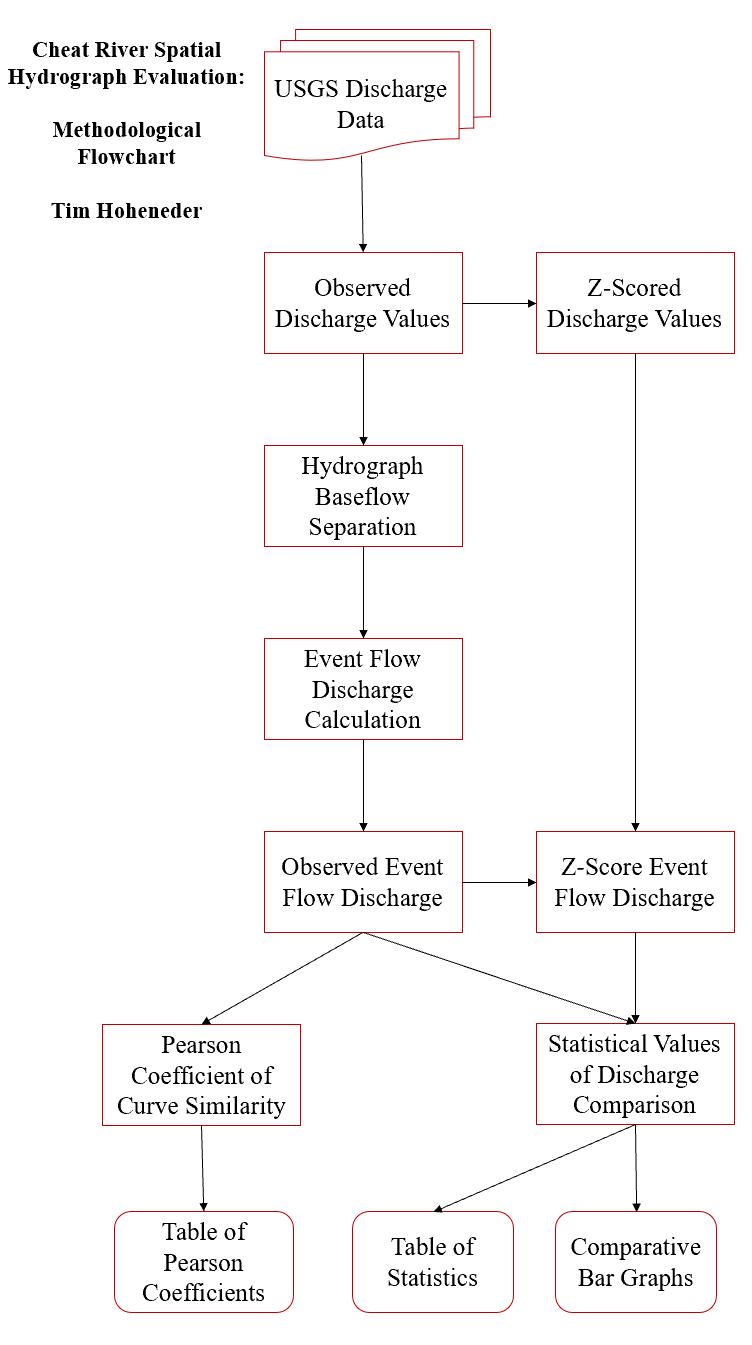
    <center> Image: Methodological Flowchart of Spatial Hydrograph Evaluation of the Cheat River Watershed

All data for this was completed utilizing the Python coding software suite, and all project analysis was conducted using the associated Python coding packages of **NumPy** and **Pandas**. Data downloaded from the USGS NWIS hydrologic database was used to retrieve 15-min discharge data for all six gauges from the Cheat River watershed into a single conglomerated timeseries. This single timeseries was converted to a single Pandas dataframe per stream gauge location for data manipulation purposes. 

Within this dataframe, the index included the date and time of each discharge measurement and each column specified the discharge measurement, in cubic feet per second (cfs) of each of the six USGS gauge locations. Following entry into the Python platform, equivalent values of discharge were found for each measurement in terms of discharge in cm/hr as a product of the total watershed extent and a normalized z-score value to identify the degree of variance from normal of each discharge value. As previously mentioned, this Z-score value was calculated to limit the effects of stream order and magnitude within the watershed. Moving values to a z-score basis provides a more equivalent grounds for comparison and analysis when comparing various gauges and rivers. 



In [ ]:
#%% DataFrame Operations: 

#Define Function for Z-Score Calculations: 
def zscore_Q(df):
    #Calculate Z-Score for DataFrame:
    df['Z-Score Q']= (df['Discharge (cfs)'] - df['Discharge (cfs)'].mean()) / df['Discharge (cfs)'].std()

#Define Function for Discharge Equivalence in cm/hr: 
def discharge_cmhr(df): 
    #Calculate Discharge in cm/hr: 
    df['Discharge (cm/hr)']= (df['Discharge (cfs)']/watershed_area * (1/5280**2) * 30.48 * 3600)

#For Loop to Calculate Z-Score for Each DataFrame: 
for item in df_list:
    #Iterate For Loop to Calculate Z-Scores:
    zscore_Q(item)
    #Iterate For Loop to Calculate Discharge Equivalence: 
    discharge_cmhr(item)

for item in df_trim_list:
    #Iterate For Loop to Calculate Z-Scores:
    zscore_Q(item)
    #Iterate For Loop to Calculate Discharge Equivalence: 
    discharge_cmhr(item)

#Output Text Statement: 
print('Calculated Z-Scores for DataFrames')
print('')
print('Discharge Equivalence in cm/hr Calculated for Each DataFrame')
print('')


## <center> **Plotting Discharge Time Series**

Generating time series to visualize how discharge progressed for the storm event across each of the six measurment gauges. Plots were generated as time series for dependent values of discharge. Plotting these raw time series allows for a visualization of the discharge curves preceeding any analysis of their timing and curve geometry. 

**Time Series Iterations:**
* Discharge (cm/hr)
* Discharge (Z-Score)

As this study exclusively focuses upon the 2019 Cheat River flooding event, the temporal period of observation was limited to **3 days (June 27th, 2019)** preceding the storm event, throughout the duration of the storm event, and terminating **7 days (July 7th, 2019)** following the end of precipitation. This period was selected as it allowed for the most cohesive estimation of baseflow conditions as a relatively normal rate of baseflow without the significant influence of precipitation could be determined. 

The major visual product of this step is the time series (**Figure Number**) displaying the rise and fall of the hydrograph over the duration of the period of study representing the movement of the storm system through the watershed as a hydrologic pulse. Each line in the time series plot represents a different USGS streamflow gauge such that the magnitude of flow can be visually inferred. Given hydrologic discharge data does not typically display any significant seasonality trends in the roughly two week period this study observes, no need for further time series manipulation or extraction of residual values was seen as necessary analysis. 

In [ ]:
#%% Plotting Initial Time Series Curves Over Full Duration: 

#Create Plotting Area:     
fig, ax1 = plt.subplots()

#Plot Discharge Data: 
#Albright:
ax1.plot(df_albright_trim['Discharge (cm/hr)'], ',', linestyle='-', color='navy', label='Albright')
#Blackwater: 
ax1.plot(df_blackwater_trim['Discharge (cm/hr)'], ',', linestyle='-', color='grey', label='Davis')
#Bowden: 
ax1.plot(df_bowden_trim['Discharge (cm/hr)'], ',', linestyle='-', color='dodgerblue', label='Bowden')
#Hendricks: 
ax1.plot(df_hendricks_trim['Discharge (cm/hr)'], ',', linestyle='-', color='maroon', label='Hendricks')
#Parsons: 
ax1.plot(df_parsons_trim['Discharge (cm/hr)'], ',', linestyle='-', color='orange', label='Parsons')
#Rockville: 
ax1.plot(df_rockville_trim['Discharge (cm/hr)'], ',', linestyle='-', color='darkgreen', label='Rockville')

#Axis Formatting: 
ax1.set_ylim(bottom = 0)
ax1.set_xlim(df_albright_trim.index[0], df_albright_trim.index[-1])
fig.autofmt_xdate()

#Axis Labels: 
ax1.set_ylabel('Discharge (cm/hr)', color='k', fontweight="bold", fontsize= 12)
ax1.set_xlabel('Date', color='k', fontweight="bold", fontsize= 12)
fig.suptitle('Discharge Curves for Cheat River Watershed', fontweight= "bold", fontsize=18)

#Legend: 
fig.legend(bbox_to_anchor= (1.15, 0.75)) 

In [ ]:
#%% Plotting Initial Time Series Curve Z-Scores Over Full Duration: 

#Create Plotting Area:     
fig, ax1 = plt.subplots()

#Plot Discharge Data: 
#Albright:
ax1.plot(df_albright_trim['Z-Score Q'], ',', linestyle='-', color='navy', label='Albright')
#Blackwater: 
ax1.plot(df_blackwater_trim['Z-Score Q'], ',', linestyle='-', color='grey', label='Blackwater')
#Bowden: 
ax1.plot(df_bowden_trim['Z-Score Q'], ',', linestyle='-', color='dodgerblue', label='Bowden')
#Hendricks: 
ax1.plot(df_hendricks_trim['Z-Score Q'], ',', linestyle='-', color='maroon', label='Hendricks')
#Parsons: 
ax1.plot(df_parsons_trim['Z-Score Q'], ',', linestyle='-', color='orange', label='Parsons')
#Rockville: 
ax1.plot(df_rockville_trim['Z-Score Q'], ',', linestyle='-', color='darkgreen', label='Rockville')

#Axis Formatting: 
ax1.set_xlim(df_albright_trim.index[0], df_albright_trim.index[-1])
fig.autofmt_xdate()

#Axis Labels: 
ax1.set_ylabel('Discharge (cm/hr)', color='k', fontweight="bold", fontsize= 12)
ax1.set_xlabel('Date', color='k', fontweight="bold", fontsize= 12)
fig.suptitle('Z-Scored Discharge Curves for Cheat River Watershed', 
             fontweight= "bold", fontsize=18)

#Legend: 
fig.legend(bbox_to_anchor= (1.15, 0.75)) 

## <center> **Hydrograph Seperation of Discharge Curves:**

This first major step of this study's methoodlogy is the speration of raw discharge values into subsequent values of **baseflow** and **event flow**. The seperation of hydrograph values is a critical step as it allows for the evaluation of the watershed's response to new, input volumes of water in its system (Blume et al., 2007). The watershed's response provides insight regarding how affected a given hydrologic channel is based upon the magnitude of water input to the water body. In this report, the response is assumed to solely be based upon the influence of the single storm event analyzed. Therefore, it should be visible not only **when** each river was impacted by the storm, but also the progression of the storm system through the watershed. 

* **Baseflow:** The sustaining flow of a river system; the approximated discharge of the river system independent of additional hydrological inputs

* **Event Flow:** Discharge quantity above the base flow discharge. Effectively, the response of the hydrograph to a particular storm event in terms of discharge

For the purposes of this study, seperating values into baseflow and event flow discharge allows for the evaluation of **when** peak discharge arrived, **how much** total discharge was associated with the storm event, and how those values **compare** temporally and in magnitude across the six gauges in the Cheat River watershed. If there is a variation in the arrival of peak discharge, then we can assume which gauges are upstream and downstream of each other. 

All values were normalized into a z-score value of discharge as well as a raw observable value. Normalization of observed discharge values to a z-score value ensures that the order of magnitude across various streamflow gauges is being represented in a common scale. While all streamflow gauges inherently will increase with any given amount of positive net water input into the system, morphological factors such as channel depth, width, and other considerations all greatly affect how flow moves through the channel at the point of measurement (Crinklaw, 2018). Z-scores largely bypasses fluvial geomorphological influences where the dependent discharge scale is not only common across all stream gauges, but is more representative of the specific channel conditions than a value of raw discharge.  


In [ ]:
#%% Hydrograph Seperation Function: 

#Define Function:
def hydrograph_sep(totalq, watershed):

    #Find totalq: 
    totalq['Diff'] = totalq['Discharge (cm/hr)'].diff()
    
    #Find Antecedent Discharge and Date using 0.000104 Threshold: 
    global antQ_date
    antQ = (totalq.loc[totalq['Diff'] > 0.000104, 'Discharge (cm/hr)'])
    antQ_date = antQ.index[0]
    antQ_val = round(antQ[0], 3)
    
    #Find Peak Discharge Date: 
    peakQ_date = totalq['Discharge (cm/hr)'].idxmax()
    peakQ = totalq['Discharge (cm/hr)'].max()   
    
    #Calculate Event Duration:
    N = 0.82*(watershed*1e-6)**0.2
    #Calculate End of Event: 
    global end_of_event
    end_of_event = peakQ_date + datetime.timedelta(days = N)
    
    #Calculate Ending Discharge Value: 
    end_Q = totalq.iloc[totalq.index.get_loc(end_of_event,method='nearest'), 
                        totalq.columns.get_loc('Discharge (cm/hr)')]
    
    #Create baseQ Dataframe:
    global baseQ
    baseQ = totalq[['Discharge (cm/hr)']].copy()
    
    #Calculate Base Discharge Curve Before Peak: 
    slope1, intercept1= np.polyfit(totalq.loc[totalq.index < antQ_date].index.astype('int64')
                                /1E9, totalq.loc[totalq.index < antQ_date, 'Discharge (cm/hr)'], 1) 

    #Append Data Before Peak: 
    baseQ.loc[antQ_date:peakQ_date,"Discharge (cm/hr)"] = slope1 * (totalq.loc[antQ_date:peakQ_date].index.view('int64')/1e9) + intercept1
    
    #Calculate Base Discharge Curve After Peak: 
    slope2, intercept2= np.polyfit([peakQ_date.timestamp(), end_of_event.timestamp()], 
                               [baseQ.loc[peakQ_date, 'Discharge (cm/hr)'], end_Q], 1)
    
    #Append Data After Peak: 
    baseQ.loc[peakQ_date:end_of_event,"Discharge (cm/hr)"] = slope2 * (totalq.loc[peakQ_date:end_of_event].index.view('int64')/1e9) + intercept2
    
    #Append BaseQ Values to DataFrame: 
    totalq['BaseQ (cm/hr)'] = baseQ['Discharge (cm/hr)']
    
    #Return Variables: 
    return (baseQ, antQ_date, antQ_val, peakQ_date, peakQ, end_of_event, end_Q)


In [ ]:
#%% Modified Time Series Plotting Containing Baseflow: 
    
#Define Function with Keyword Arguement for Baseflow: 
def timeseriesplot(df1, startdate, enddate, baseflow= None):    

    #Create Plot Area: 
    fig, ax1 = plt.subplots()

    #Plot Discharge Data: 
    ax1.plot(df1['Discharge (cm/hr)'], ',', linestyle='-', color='navy', label='Discharge (cm/hr)')

    #Axis Formatting: 
    ax1.set_ylim(bottom = 0)
    ax1.set_xlim(startdate, enddate)
    fig.autofmt_xdate()

    #Axis Labels: 
    ax1.set_ylabel('Discharge (cm/hr)', color='k', fontweight="bold", fontsize= 12)
    ax1.set_xlabel('Date', color='k', fontweight="bold", fontsize= 12)
    
    #Optional Arguement Boolean Indicator: 
    if baseflow is not None: 
        ax1.plot(baseflow['Discharge (cm/hr)'], ',', linestyle='-', color='darkseagreen', 
                 label=' Baseflow (cm/hr)')
    
    #Legend: 
    fig.legend(bbox_to_anchor= (0.65, 0.0))  

## <center> **Creating Values of Event Discharge**

To determine the volume of discharge across the storm event, the baseflow discharge value was subtracted from the event flow value. In this sense, a value of event flow is determined for the system that rises above the typical, antecedent, baseflow discharge. This is the movement of excess water that is moving through the system at a given time, and creates the “pulse” of the storm event through the Cheat River watershed. This value is important in the context of the study as it the volume of water that the storm event created. Observing the response based upon this value alone is perhaps the most insightful means of how a watershed's rivers react to a large storm event.  

* **$Q_{Event} = Q_{Observed}  - Q_{Base}$**

Relatedly, once this effective flow value is calculated, to determine the total volume of effective flow discharge of the storm event, the effective flow discharge curve was integrated over the duration of the storm event. This provides a volumetric measurement of how much water moved through the point of measurement throughout the storm event.


In [ ]:
#%% Determine Effective Flow: 

#Define Function: 
def effect_flow(df): 
    #Calculate Effective Flow: 
    #Ensure All Values of Event Flow are Positive: 
    df['BaseQ (cm/hr)']= np.where(df['BaseQ (cm/hr)'] > 0, df['BaseQ (cm/hr)'], 0)
    #Redefine Values of Event Flow Equal to Discharge as 0: 
    df['Eff Flow (cm/hr)']= np.where(df['Discharge (cm/hr)'] - df['BaseQ (cm/hr)'] > 0,  
                                     df['Discharge (cm/hr)'] - df['BaseQ (cm/hr)'], 0)
        
#Create For Loop to Run Function for Each DataFrame: 
for item in df_list:
    #Run Event Flow-Effect Flow Function: 
    effect_flow(item)

#Output Text Statement to Confirm For Loop:
print('')
print('Event Flow Calculated for Each DataFrame')
print('')


In [ ]:
#%% Calculate Z-Score for Effective Flow:  

#Define Fnction: 
def zscore_eventflow(df):
    #Create Z-Score for Event Flow: 
    df['Z-Score EffQ']= (df['Eff Flow (cm/hr)'] - df['Eff Flow (cm/hr)'].mean()) / df['Eff Flow (cm/hr)'].std() 

#For Loop to Iterate Through: 
for item in df_list: 
    #Iterate Thorugh Function: 
    zscore_eventflow(item)
    
#Let Me Know This Ran: 
print('Solved Z-Score for Event Flows')
print('')


## <center> **Calculating Pearson Coefficient Values for Discharge Curve Correlation**

The last step of this study is to determine how similar or different the various discharge curves are to each other. A measure of similairty of discharge profiles will provide the information we are seeking regarding determining how a storm event moves thorughout a watershed.


A Pearson correlation will generate a coefficient value between -1 and 1 that indicates whether the time series being evaluated are:

* **Positively Correlated (1)**
* **Not Correlated (0)**
* **Negatively Correlated (-1)**


Given the Pearson coefficient is a global rating of synchrony between multiple datasets, an assumption is made to neglect small, spatial phenomena that influence discharge, such as fluctuating temperatures above freezing. It is expected the effects of these phenomena, if present, are temporary and minute enough that they will not affect the global synchrony and correlation of any of the time series.

In [ ]:
#%% Pearson Coefficient Calculation for Time Series: 

#Create Empty Array to Store PEarson Values for Comparison: 
pearson_array= []    

#Albright-Davis Correlation: 
AlbrightDavisQ=df_albright['Discharge (cm/hr)'].corr(df_blackwater['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(AlbrightDavisQ)

#Albright-Bowden Correlation: 
AlbrightBowdenQ=df_albright['Discharge (cm/hr)'].corr(df_bowden['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(AlbrightBowdenQ)
    
#Albright-Hendricks Correlation: 
AlbrightHendricksQ=df_albright['Discharge (cm/hr)'].corr(df_hendricks['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(AlbrightHendricksQ)

#Albright-Parsons Correlation:
AlbrightParsonsQ=df_albright['Discharge (cm/hr)'].corr(df_parsons['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(AlbrightParsonsQ)    

#Albright-Rockville Correlation: 
AlbrightRockvilleQ=df_albright['Discharge (cm/hr)'].corr(df_rockville['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(AlbrightRockvilleQ)

#Davis-Bowden:
DavisBowdenQ=df_blackwater['Discharge (cm/hr)'].corr(df_bowden['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(DavisBowdenQ)    

#Davis-Hendricks:
DavisHendricksQ=df_blackwater['Discharge (cm/hr)'].corr(df_hendricks['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(DavisHendricksQ)    

#Davis-Parsons:
DavisParsonsQ=df_blackwater['Discharge (cm/hr)'].corr(df_parsons['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(DavisParsonsQ)

#Davis-Rockville: 
DavisRockvilleQ=df_blackwater['Discharge (cm/hr)'].corr(df_rockville['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(DavisRockvilleQ)

#Bowden-Hendricks: 
BowdenHendricksQ=df_bowden['Discharge (cm/hr)'].corr(df_hendricks['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(BowdenHendricksQ)    

#Bowden-Parsons: 
BowdenParsonsQ=df_bowden['Discharge (cm/hr)'].corr(df_parsons['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(BowdenParsonsQ)    

#Bowden-Rockville: 
BowdenRockvilleQ=df_bowden['Discharge (cm/hr)'].corr(df_rockville['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(BowdenRockvilleQ)

#Hendricks-Parsons: 
HendricksParsonsQ=df_hendricks['Discharge (cm/hr)'].corr(df_parsons['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(HendricksParsonsQ)    

#Hendricks-Rockville: 
HendricksRockvilleQ=df_hendricks['Discharge (cm/hr)'].corr(df_rockville['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(HendricksRockvilleQ)

#Parsons-Rockville: 
ParsonsRockvilleQ=df_parsons['Discharge (cm/hr)'].corr(df_rockville['Discharge (cm/hr)'])
#Append to List: 
pearson_array.append(ParsonsRockvilleQ)


In [ ]:
#%% Creating Small DataFrame for Pearson Values: 
      
#List of Gauge Combinations for Reference: 
ref_list = ['Albright-Davis', 'Albrihgt-Bowden', 'Albright-Hendricks', 'Albright-Parsons', 'Albright-Rockville', 
            'Davis-Bowden', 'Davis-Hendricks', 'Davis-Parsons', 'Davis-Rockville', 
            'Bowden-Hendricks', 'Bowden-Parsons', 'Bowden-Rockville', 
            'Hendricks-Parsons', 'Hendricks-Rockville', 
            'Parsons-Rockville']
  
# Calling DataFrame constructor after Zipping:
pearsondf = pd.DataFrame(list(zip(ref_list, pearson_array)),
               columns =['Gauge Combination', 'Pearson Coefficient Value'])


# <center> **Results of the Study:**

**Major Results Products:**
* Time Series of Discharge Isolating Each Location Displaying Baseflow and Event Flow Discharge  
* Conglomerated Time Series of Event Flow Discharges by Location in terms of cm/hr and Z-Scores
* Bar Graph Comparing the Total Discharge Volume by Location for the Storm Event
* Table of Basic Statistics of Event Flow by Location 
* Table and Bar Graph of Pearson Coefficient Values by Coupled Stream Gauge Location Combination 



In [ ]:
# First Cell to Dirve Results

## <center> **Hydrograph Seperation Function to Visualize and Quantify Baseflow**

Generation of **Time Series Curves** for each study site location in terms of cm/hr discharge for the seperate **baseflow** and **observed discharge** curves. A line of event flow is not included on these plots, but is calculated in the background of the below functions. As previoulsy mentioned, baseflow should never exceed the observed discharge, such for periods of time not identified with the storm event, baseflow was assumed to be equivalent to the observed discharge. This seperation was performed to not need to extract the influence of previous storm events or other influences onto the rising limb discharge curves.  

**What Does This Show?:**
* What Are the Baseflow and Event Flow Discharge Values for a Given Site?
* How Does Baseflow and Event Flow Vary in Magnitude Over Time? 
* How Does the Baseflow Relate Itself to the Event Flow for a Specific Site?    

In [ ]:
#%% Running Functions per Watershed: 

#Create Empty Array for Storm Totals: 
storm_totals = []    

#Define Function for Running Functions per Watershed: 
def watershed_function(df):
    #Run Hydrograph Seperation Function: 
        (baseQ, antQ_date, antQ_val, peakQ_date, peakQ, end_of_event, end_Q) = hydrograph_sep(df, watershed_area)
        #Integrating Storm Total: 
        storm_frame= df[antQ_date : end_of_event]
        discharge_total= storm_frame['Discharge (cm/hr)'].sum()
        storm_totals.append(discharge_total)
        #Run Time Series Plotting Function: 
        timeseriesplot(df, df.index[0], df.index[-1], baseQ)

#For Loop to Iterate Through Locations: 
for item in df_list: 
    watershed_function(item)

#Output Text Statement to Let Me Know This Ran: 
print('')
print('Congrats, You Probably Have Some Graphs Now...')
print('')


## <center> **Visualziation of Event Flow Discharge Curves**

Generation of Time Series Curves for Each Location in terms of cm/hr discharge and Z-Score values. These plots dispaly the result of the previous iterative plots of observed discharge and baseflow. Such, this is the subtractive product of those individual plots. As previously mentioned, baseflow was assumed to be equal to observed flow for periods outside of the storm event duration to not require to analyze the influence of previous storm events on the hydrograph or other outside influences. 

.

**What Does This Show?:**
* How does the magnitude of peak event flow vary by site?
* How does the magnitude of event flow discharge change over time?
* How do the curves of event flow discharge vary from site to site?   

.

**Analysis of Results:**

For the observed values of event flow, the most clearly present observation is the difference in magnitude of the streams. While gauges such as Albright, Hendricks, and Parsons are clearly apparent in the chart, smaller gauges such as the Davis (Blackwater) gauge or Rockville are barely apaprent. However, we can observed there is a similar timing of curves within these hydrographs. The timing of the Albright curve is offset, but this might confirm the fact the Albright gauge is downstream of all other gauges, and such, it took more time to reach said gauge. 

For the Z-scored curves of event flow, we can see much of the same trends in the temporal arrival of heightened event discharge. All gauges effectively rise at approximately the same time to a relatively similar magnitude. The largest difference arrives in the nature of the Albright gauge being offset, as previoulsy discussed, as well as the dual peaks of the Blackwater gauge. This gauge is hypothesized to be dually peaked due to the orographic influence of the Appalachian Front, which is located directly next to the gauge site in Davis. 

In [ ]:
#%% Plotting Effective Flow Curves Over Full Duration: 

#Define Function for Variable Plotting Windows: 
def eventflow_plotting(start_window, end_window):     

    #Create Plotting Area:     
    fig, ax1 = plt.subplots()

    #Plot Discharge Data: 
    #Albright:
    ax1.plot(df_albright['Eff Flow (cm/hr)'], ',', linestyle='-', color='navy', label='Albright')
    #Blackwater: 
    ax1.plot(df_blackwater['Eff Flow (cm/hr)'], ',', linestyle='-', color='grey', label='Blackwater')
    #Bowden: 
    ax1.plot(df_bowden['Eff Flow (cm/hr)'], ',', linestyle='-', color='dodgerblue',  label='Bowden')
    #Hendricks: 
    ax1.plot(df_hendricks['Eff Flow (cm/hr)'], ',', linestyle='-', color='maroon', label='Hendricks')
    #Parsons: 
    ax1.plot(df_parsons['Eff Flow (cm/hr)'], ',', linestyle='-', color='orange', label='Parsons')
    #Rockville: 
    ax1.plot(df_rockville['Eff Flow (cm/hr)'], ',', linestyle='-', color='darkgreen', label='Rockville')

    #Axis Formatting: 
    ax1.set_ylim(bottom = 0)
    ax1.set_xlim(df_albright.index[start_window], df_albright.index[end_window])
    fig.autofmt_xdate()

    #Axis Labels: 
    ax1.set_ylabel('Discharge (cm/hr)', color='k', fontweight="bold", fontsize= 12)
    ax1.set_xlabel('Date', color='k', fontweight="bold", fontsize= 12)
    fig.suptitle('Event Flow Discharge Curves for Cheat River Watershed', fontweight= "bold", fontsize=18)

    #Legend: 
    fig.legend(bbox_to_anchor= (1.15, 0.75))  

#Function for Full Duration: 
eventflow_plotting(0, -1)
    
#Function for Zoomed-In Duration: 
eventflow_plotting(275, -675) 


In [ ]:
#%% Plotting Z-Scored Effective Flow Curves Over Full Duration: 

#Create Function for Z-Score Plotting:     
def zscore_event_plotting(start_window, end_window): 
    
    #Create Plotting Area:     
    fig, ax1 = plt.subplots()

    #Plot Discharge Data: 
    #Albright:
    ax1.plot(df_albright['Z-Score EffQ'], ',', linestyle='-', color='navy', label='Albright')
    #Blackwater: 
    ax1.plot(df_blackwater['Z-Score EffQ'], ',', linestyle='-', color='grey', 
         label='Blackwater')
    #Bowden: 
    ax1.plot(df_bowden['Z-Score EffQ'], ',', linestyle='-', color='dodgerblue', label='Bowden')
    #Hendricks: 
    ax1.plot(df_hendricks['Z-Score EffQ'], ',', linestyle='-', color='maroon', 
         label='Hendricks')
    #Parsons: 
    ax1.plot(df_parsons['Z-Score EffQ'], ',', linestyle='-', color='orange', label='Parsons')
    #Rockville: 
    ax1.plot(df_rockville['Z-Score EffQ'], ',', linestyle='-', color='darkgreen', 
         label='Rockville')

    #Axis Formatting: 
    ax1.set_xlim(df_albright.index[start_window], df_albright.index[end_window])
    fig.autofmt_xdate()

    #Axis Labels: 
    ax1.set_ylabel('Discharge (cm/hr)', color='k', fontweight="bold", fontsize= 12)
    ax1.set_xlabel('Date', color='k', fontweight="bold", fontsize= 12)
    fig.suptitle('Z-Scored Event Discharge Curves', 
             fontweight= "bold", fontsize=18)

    #Legend: 
    fig.legend(bbox_to_anchor= (1.15, 0.75))     

#Function for Full Duration: 
zscore_event_plotting(0, -1)
    
#Function for Selected Window: 
zscore_event_plotting(275, -675)


## <center> **Determine Basic Statistical Properties of Event Flow per USGS Gauge Location:**

A list of variables per site location for the duration of the storm event. 
All of these values provide a means of comparison throughout the watershed. Theoretically, those that are most similar in these values could have the most similar curve geometries. Additionally, if values vary between upstream and downstream locations, it then becomes possible to also generally state how the movement of water increases as it continues to move throughout a watershed system. Again, of note, the Bowden gauge is to be a control gauge in this system, such that it should not be affected in the same means other guages in this system are affected. We should, on average, see much lower or more normalized values for this gauge as it was not largely impacted by the storm event. 

**Statistics Calculated:**
* Maximum Event Discharge
* Maximum Event Discharge Z-Score
* Maximum Observed Discharge
* Maximum Observed Discharge Z-Score
* Average Event Discharge

**Table of Selected Comparative Values:**

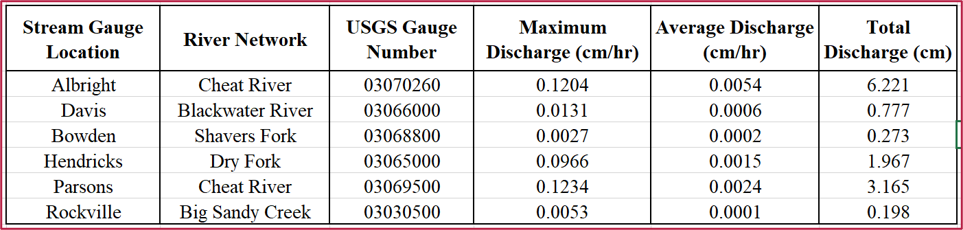

**What Can This Tell Us?:**
* How does peak event discharge vary across numerous sites? 
* How does the average event discharge vary across numerous sites? 
* How do the different study site gauges vary in magnitude? 
* How does water move thorugh a watershed in terms of volume and magnitude? 

In [ ]:
#%% Determine Maximum Values of Discharge: 

#Create Empty Arrays for Quick Reference of Values: 
#Maximum Discharge Values: 
max_q = []
max_q_zscore= []

#Average Discharge Values: 
avg_q= []

#Maximum Event Flow Discharge Values: 
highest_events= []
highest_events_zscore= []

#Minimum Event Flow Discharge Values: 
min_q= [] 
min_event_zscore= [] 

#Function for Max Discharge: 
def max_discharge(df):
    #Calculate Maximum:     
    big_q= df['Discharge (cm/hr)'].max()
    #Append to List: 
    max_q.append(big_q)
    
#Function for Max Discahrge Z-Score: 
def max_discharge_zscore(df):
    big_q_zscore= df['Z-Score Q'].max()
    max_q_zscore.append(big_q_zscore)

#Function for Max Discharge: 
def max_event(df):
    max_event_val= df['Eff Flow (cm/hr)'].max()
    highest_events.append(max_event_val)
    
#Function for Max Discahrge Z-Score: 
def max_event_zscore(df):
    max_event_valz= df['Z-Score EffQ'].max()
    highest_events_zscore.append(max_event_valz)

#Function for Average Discharge: 
def avg_event(df):
    avg_event_val= df['Eff Flow (cm/hr)'].mean()
    avg_q.append(avg_event_val)

#For Loop to Iterate Through Gauges: 
for item in df_list: 
    #Iterate Through Functions: 
    max_discharge(item)
    max_discharge_zscore(item)
    max_event(item)
    max_event_zscore(item)
    avg_event(item)
    
#Output Text Statement: 
print('')
print('For Loop Complete: Values Appended to Lists')
print('')


## <center> **Plotting Volumes of Total Discharge per USGS Gauge Location:**

This graphical output is the creation of a bar graph plot to display how much water ran through each gauging station for the duration of the full storm event, as well as other similar statisical values of comparison. This plot will help us to graphically represent where a certain volume of flow was located during the storm and, in a general sense, how the storm's impacts varied from area to area. To help visualize the effect of how the specific hydrologic system might play a role in this, each gaueg was color-coded according to the system it was located within. Unfortunately, all of the gauges in the Cheat River except for the Albright and Parsons gauge are located in different sub-basins of the Cheat River watershed. In essence, these plots allow for the viewership of how much water moved through a particular area, the quantities of that water, and such, perhaps which area the storm was centered upon. 



**Effectively, these plots are a visual product of two variables:**  
*   Magnitude of Discharge 
*   Duration of the Storm Event



Our purposes will allow us to see that even though these stream gauging locations might vary in scale, if the normalized amount of flow through a specific pattern of stations is visible in this plot, we can begin to decypher how a "pulse" of water moves thorughout a watershed during a single large-scale storm event. 

**Analysis of Results:**
The primary conclusion that can be reached from this series of plots is that the Cheat River proper dominates the hydrologic system. When viewing the observed discharge values, no other gauge comes close to magnitude of maximum or average flow observed at the Albright gauge. This gauge should have larger values than the Parsons gauge as well as it is downstream of that location. Thankfully, those trends appear to hold up across all plots. Curiously, the plots of total and average observed storm discharge are eerily familiar to one another. While there is the *smallest* visual difference between them, these plots are nearly identical to one another. 

The other primary conclusion that can be reached from these plots is the location of the storm front over the region of the Parsons and Hendricks gauges. This can be stated as we observed maximum z-scored discharge values at these gauges were the highest amongst all gauges in the watershed, even the Albright gauge. This might indicate that the storm was its storngest in this general area as it passed through the watershed. Given the short distance between these gauges as well as the influence the Appalachian Front might play in them as well, this trend seems to have a logical geographic explanation.  

In [ ]:
#%% Plotting Total Discharge Storm Event Volumes: 

#Define Bar Graph Plotting Function: 
def bar_plotting(series, barplot_title, barplot_ylab):    

    #Create Plotting Area: 
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    #Add Data Bars: 
    locations = ['Albright', 'Davis', 'Bowden', 'Hendricks', 'Parsons', 'Rockville']
    discharge_series = series
    plotting_series = pd.Series(discharge_series, locations)

    #Colors by Watershed: 
    barplot_colors=  ['dodgerblue', 'darkorange', 'indigo', 'seagreen', 'dodgerblue', 'maroon']

    #Axis Labels: 
    ax.set_ylabel(barplot_ylab, color='k', fontweight="bold", fontsize= 12)
    ax.set_xlabel('Location of Measurement', color='k', fontweight="bold", fontsize= 12)
    ax.set_title(barplot_title, fontweight= "bold", fontsize=18)
    
    #Display Bar Plot: 
    plotting_series.plot(kind='bar', color=barplot_colors)
    plt.show()

#Run Function for Various Series: 
bar_plotting(storm_totals, 'Total Storm Event Discharge', 'Total Discharge (cm)') #Storm Totals
bar_plotting(avg_q, 'Average Storm Event Discharge', 'Average Discharge (cm)') #Average Discharge
bar_plotting(max_q, 'Maximum Storm Event Discharge', 'Maximum Discharge (cm)') #Maximum Discharge
bar_plotting(max_q_zscore, 'Max Storm Event Discharge: Z-Score', 'Max Discharge (cm)') #Max Q as Z-Score

## <center> **Statistical Evaluation of Pearson Correlation Coefficients:**

A list of pearson coefficient curve similarity value per coupled site location for the duration of the storm event. All possible dually-coupled site location combination were utilized for the study and were named on the basis of which two sites each coupling included. A table and visiualzied bar grpah format, along with basic statistics, were produced for the collection of pearson coefficients.

While not inherrently powerful on their own, each of these metrics provide a point of comparison across each site location. Comparing each of these metrics across the full watershed extent can provide us insight as to what observable trends are present between any combination of site locations. Effectively, this can provide a means of how a watershed is geographically impact by a given storm event. 

**Statistics Calculated:**
* Maximum Pearson Coefficient
* Minimum Pearson Coefficient
* Average Pearson Coefficient

**What Can This Tell Us?:**
* How similar is a discharge curve across study sites?
* Does the location of a storm event affect the discharge curve geometry?   
* How do the different study site combination pearson coefficients vary in magnitude?  

**Table of Pearson Values:**

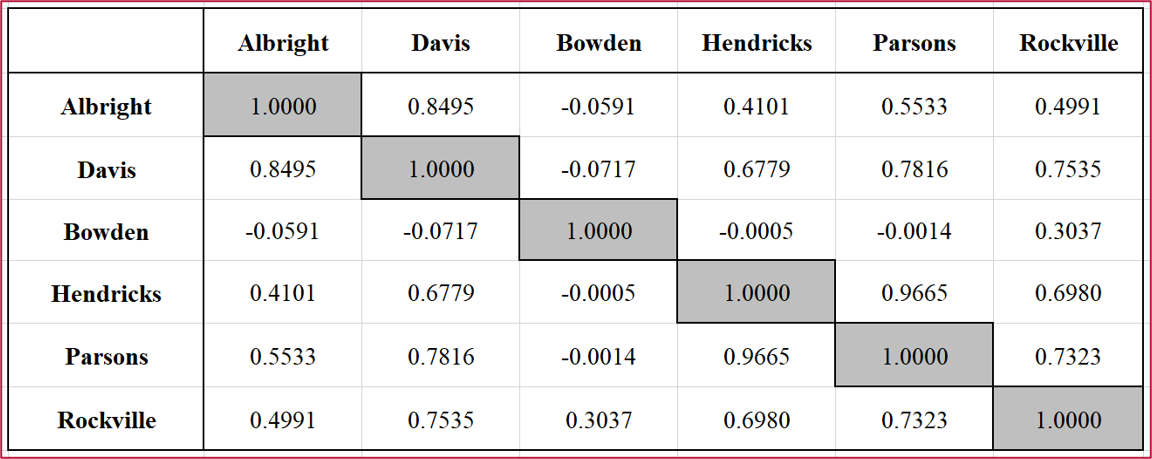

**Analysis of Results:**

The most immediate takeaway that is observed from the Pearson Coefficients is the similarity of many curves to one another, especially as a function of distance. The gauges that are most similar seem to be those that are closest in distance such as the Hendricks and Parsons gauge. Additionally, gauges are almost universally most disimilar to the Bowden gauges which indicates that the control gauge fo this study was effective as no single gauge had a storng correlation to the Bowden gauge. In fact, based upon the values seen at the Bowden gauge, it is possible to say it was the single least correlated gauge as many values hovered directly at, or near, 0. 

In [ ]:
#%% Basic Insight to Pearson Coefficients: 

#Most Similar Gauge Profiles: 
max_pearson = max(pearson_array)
#Output Text Statement: 
print('')
print('The Highest Pearson Coefficient Was %6.4f' %max_pearson)
print('')

#Least Similar Gauge Profiles: 
min_pearson = min(pearson_array)
#Output Text Statement: 
print('')
print('The Lowest Pearson Coefficient Was %6.4f' %min_pearson)
print('')

#Average Across Watershed: 
#Sum of Values: 
sum_pearson= sum(pearson_array)
#LEngth of Array as Proxy of Number of Records: 
len_pearson= len(pearson_array)
#Mean of Array Values: 
avg_pearson = sum_pearson / len_pearson
#Output Text Statement: 
print('')
print('The Average Pearson Coefficient Was %6.4f' %avg_pearson)
print('')


In [ ]:
#%% Bar Graph to Display Pearson Values Not in Table: 

#Create Plotting Area: 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#Add Data Bars: 
locations = ref_list
bars = pearson_array
ax.bar(locations, bars, color = 'navy')

#Axis Labels: 
ax.set_ylabel('Pearson Coefficient Value', color='k', fontweight="bold", fontsize= 12)
ax.set_xlabel('USGS Gauge Location Combination', color='k', fontweight="bold", fontsize= 12)
ax.set_title('Pearson Coefficient Values by Gauge Station Combination', fontweight= "bold", fontsize=18)
    
#Display Bar Plot: 
plt.show() 


# <center> **Discussion of Results**

The principle findings of this study are contingent on the geometry of the curves geometries and the storm locations. While it is obvious that discharge curves will vary by location, the results of this study more-so suggests that the discharge curves will vary at a higher degree based upon the location of the storm opposed to a gauge being located in an upstream or downstream position within the watershed. 

## **Conclusion 1: Magnitude of Discharge is Correlated to the Magnitude of Stream**

* In the Z-Scored time series, almost all of the curves displayed a similar curve geometry for the peak discharge value. The only exception to this trend was the Blackwater River in Davis, WV which displayed a dually-peaked curve geometry slighlty lower than that of the other gauges. While the Albright, WV gauge was slighlty delayed in its curve, the curve geometry is similar to the other four gauges. Since this is a time series, this is perhaps more indicative of the storm system moving through the watershed than anything related to the arrival of an increased volume of water.  

* The average Pearson Coefficient for all gauges was a value of 0.4729 which displays a decent amount fo correlation even after the average likely being degraded follwoing disimilarities with the Albright and Blackwater gauges. In fact, the Hendricks-Parsons combination displayed a 0.9665 coefficient which is a proxy for curves of 96.65% positive similarity; obviously, incredibly high correlation. This value is not isolated however, as 7 of the 14 gauge combination displayed a Pearson Coefficient above 0.65. 

##**Conclusion 2: Gauges in Similar Locations or Rivers Display Similar Magnitudes of Discharge**

* Gauges that are spatially closest to one another are those that often had the highest degree fo similarity to one another. For example, the gauges of Hendricks and Parsons had the single largest Pearson Coefficient value of 0.9665. While distance between any pair of gauges was not described in this study, this pairing is of the two single closest gauges in the study. 

* Furthermore, this trend seems to hold over other local gauge pairs wherein the pairings of Albright-Rockville, Davis-Parsons, and Davis-Hendricks also all displayed relatively high Pearson Coefficient values between one another. 

* This trend appears to be independent of the magnitude fo the river itself as the smallest observable discharge gauge (Rockville) was highly correlated with the largest observable discharge gauge (Albright). The opposite was true as well, where rivers of similar size within the Cheat River watershed, such as the Blackwater River (Davis) and Dry Fork (Hendricks) also maintained a high Pearson Coefficient   

##**Conclusion 3: The Progress of the Storm System Appears Constant Throughout Most of the Cheat River Watershed**

* The high degree of similarity of many of the discharge curves displays that the storm system uniformly progressed over the Cheat River watershed. While this study did not evaluate the quantity or rate of precipitation at each gauge location due to a lack of regular, local data coverage, we can observe highly correlated Pearson Coefficients for many of the gauges showing the hydrograph response was not only of a similar geometry, but a similar timing and magnitude for many of the site location pairs. 

* Visually, we can see that many of the discharge curves, both for cm/hr and normalized Z-Scores, display a similar progress pattern as well, with a very sharp rise on the rising limb, a pronounced peak, and then a steady exponential fall returning to baseflow conditions. The rate of exponential decay was not observed in this study as well, however the similar curve geometries proxied by the Pearson Coefficient indicate it would likely be similar. 

* The major "outlier" in terms of this storm system was that of the Blackwater River at Davis, WV. A logical explanation of why this site displayed such a different geometry compared to the other gauges is likely the storm did not progress thorugh the area in the same means. Given Davis, WV is immediately located upon the Appalachian Front, perhaps an orographic effect prohibited the same progression of the storm system. 
   

In [ ]:
#Code Cell to Advance to Next Section Header

# <center> **Major Conclusions of Study:**

The goals of this study were successful in terms of evaluating how a single large storm event progresses through and affects the hydrographic response of a given watershed. It was hypothesized that the influence of the storm event would cascade in an upstream to downstream method within the watershed. This hypothesis has been seemingly confirmed as a visible lag in peak discharge occurs in a temporal sense between numerous gauges, such as Parsons, Hendricks, and Davis, and the lagging Albrihgt gauge which is futher upstream.  

.

Additionally, it was possible to track the movement of the storm across the Cheat River watershed. This is logical, as a watershed extent can often be quite large, and especially in a topographically varied watershed such as the Cheat River watershed area, precipitation is not evenly distributed over the full extent. This notion could also be confirmed as the Bowden gauge, while inside of the watershed extent, did not experience any significant changes to its discharge curve. This is understandable as the Bowden gauge is located upstream of all other gauges, and unless a storm event passed through the region, there would be little to no response on the Bowden hydrograph. Different nuanced factors such as the orographic positionality (i.e. windward v. leeward), elevation, and location of the gauging site in reference to other locations are all drivers of how much rainfall a particular area did or did not recieve driving the hydrologic response. While not overtly analyzed, the orographic influence seen at the Davis gauge could potentially justify why it's event discharge curve featured a dual peak to it, opposed to the single peak seen with all other storm-affected gauge locations.  

.

Additionally, it was assumed all surface conditions within the watershed were fully conservative. All flows in the river were assumed to be instanteously dissapating or cumulative and no contributions were expected to be made to groundwater; a fully conservative model of hydrologic transport. While this assumption did help to uncover some of the general trends in systemic water transportation, it should not be taken as a quantitavely rigerous model. In part, because of unknown conditions such as the groundwater contribution, soil moisture, and other external influcenes, most statisitical evaluation was limited to basic metrics and correlative tests. Moving forward, to understand how these external conditions might vary across numerous sites, it could be helpful to add an explicitly spatial component to this study in terms of a flow accumulation raster. In those regards, the volume of water in a stream system at any given time can be assumed to move downstream and can be compared to the observed value of discharge. If a consistent ratio of discharge is being met on a per-cell basis, then a proxy value of upstream groundwater contribution can be determined (Saghafian et al., 2002). This would greatly improve the future results of similar studies, providing a more localized spatial vaildation of results as well as understanding the role other, non-observed, influences upon the movement of event flow in the Cheat River watershed. 

. 

As it currently stands, the data produced from this study is most helpful and applicable to residents of the Cheat River watershed as well as disaster relief policy and community planners of the greater Appalachian region. The lingering socioeconomic impacts of the 1985 Election Day Floods and other large-scale flooding events such as the observed 2019 storm event all produce a means of evaluating how the Cheat River interacts with any given storm. Given the consequences of these large storms, generating a more detailed defensive plan against these storms can help to protect the most vulnerable residents of the watershed both geographically as well as socioeconomically. While this study only anlayzed a single large storm event, observing a similar pattern or magnitudinal rise across numerous storms can begin to provide insight into the specific reactions of the watershed pathways. Predicting the response of the rivers not only provides a proxy to assist the communitites, but also provides a basis to understand how a given town will be impacted as well during a larger, less defensible, flooding event. Given these towns and communities are often low-priority sites for disatter relief efforts due to their remoteness and being historically underserved, providing validation of increased vulnerabily, or perhaps as far as modelled and quantified vulnerability, could justify resource allocation being put towards these communities. Essentially, given quantification of necessary resources, it is more likely that resouces would be allocated towards a community where wastefulness is an economic concern. Proverbially, it is better to flood these communities with tools and resources to protect themselves opposed to simply letting them flood. 
    
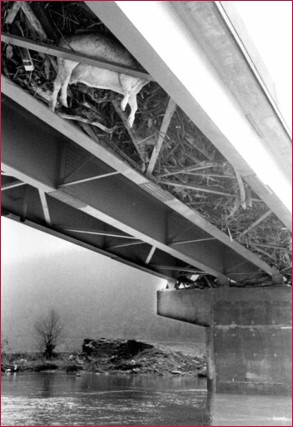
<center> Image: Cow Lodged Underneath Bridge in Rowlesburg, WV during the 1985 Election Day Floods. Image from WV History on View Collection

In [ ]:
#Code Cell to Advance to the Next Section Header

# <center> **Works Cited**

* Blume, T., Zehe, E., & Bronstert, A. (2007). Rainfall—runoff response, event-based runoff coefficients and hydrograph separation. Hydrological Sciences Journal, 52(5), 843-862.

* Carpenter, D. H. (1990). Floods in West Virginia, Virginia, Pennsylvania, and Maryland, November 1985 (Vol. 88, No. 4213). US Department of the Interior, US Geological Survey.

* Crinklaw, J. J. T. (2018). Assessment of hydrological drought in Northern Ontario using standardized streamflow index (Doctoral dissertation).

* Merriam, E. R., Petty, J. T., O’Neal, M., & Ziemkiewicz, P. F. (2020). Flow-Mediated Vulnerability of Source Waters to Elevated TDS in an Appalachian River Basin. Water, 12(2), 384.

* Nix, S., Brahler, M., Fuller, M. E., & Rowland, A. (2021). Cheat Water Resources: Assessing Climatology and Land Cover Trends and Evaluating Flood Risk of the Cheat River.

* Petty, J. T., & Barker, J. (2004). Water quality variability in tributaries of the Cheat River, a mined Appalachian Watershed. In 2004 National Meeting of the American Society of Mining and Reclamation and the 25th West Virginia Surface Mine Drainage Task Force. American Society of Mining and Reclamation, Morgantown, West Virginia (pp. 1484-1504).

* Saghafian, B., Julien, P. Y., & Rajaie, H. (2002). Runoff hydrograph simulation based on time variable isochrone technique. Journal of hydrology, 261(1-4), 193-203.

* Ziemkiewicz, P., & Simmons, J. S. (2003). Completed and future projects on the Cheat River and use of TMDL trading. In West Virginia Surface Mine Drainage Task Force Symposium, April.
